In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/mayankw/AI Assignment/MNIST


In [3]:
#function to convert the image file dataset to flattened dataset with pixel values between 0 and 255
#by removing the first 16 bits ( header infromation) the 8 more bits (label header information)
#briefly explained in line-specific comments 

def convert(img_bin_file, lbl_bin_file,
           img_txt_file, lbl_txt_file, n_images):

   img_bf = open(img_bin_file, "rb")    # binary image pixels
   lbl_bf = open(lbl_bin_file, "rb")    # binary labels

   img_tf = open(img_txt_file, "w")     # text image pixels
   lbl_tf = open(lbl_txt_file, "w")     # text labels

   img_bf.read(16)   # discard image header info
   lbl_bf.read(8)    # discard label header info

   for i in range(n_images):   # number images requested

       # do labels first for no particular reason
       lbl = ord(lbl_bf.read(1))  # get label like '3' (one byte)
       encoded = [0] * 10         # make one-hot vector
       encoded[lbl] = 1
       for i in range(10):
           lbl_tf.write(str(encoded[i]))
           if i != 9:
               lbl_tf.write(" ")  # like 0 0 0 1 0 0 0 0 0 0
       lbl_tf.write("\n")

       # now do the image pixels
       for j in range(784):  # get 784 vals for each image file
           val = ord(img_bf.read(1))
           img_tf.write(str(val))
           if j != 783:
               img_tf.write(" ")  # avoid trailing space
       img_tf.write("\n")  # next image

   img_bf.close()
   lbl_bf.close()  # close the binary files
   img_tf.close()
   lbl_tf.close()   # close the text files


In [4]:
#converting the train images and corresponding train labels to 784 (28 * 28) to flattened vector dataset
convert("train-images.idx3-ubyte",
       "train-labels.idx1-ubyte",
       "mnist_train_images.txt",
       "mnist_train_labels.txt",60000)  # first n images

#converting the test images and corresponding test labels to 784 (28 * 28) to flattened vector dataset
convert("t10k-images.idx3-ubyte",
       "t10k-labels.idx1-ubyte",
       "mnist_test_images.txt",
       "mnist_test_labels.txt",10000)  # first n images

In [4]:
#reading the train dataset and storing as numpy array, then normalizing it
x_train = pd.read_csv("mnist_train_images.txt", sep=' ', lineterminator ='\n', header = None).to_numpy()
x_train=(x_train-x_train.min())/(x_train.max() - x_train.min())
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#storing the outputs ( actual ) for the training dataset in another numpy array
y_train = pd.read_csv("mnist_train_labels.txt", sep=' ', lineterminator ='\n', header = None).to_numpy()
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [7]:
#reading the test dataset and storing as numpy array, then normalizing it
x_test = pd.read_csv("mnist_test_images.txt", sep=' ', lineterminator ='\n', header = None).to_numpy()
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
#storing the outputs ( actual ) for the training dataset in another numpy array
y_test = pd.read_csv("mnist_test_labels.txt", sep=' ', lineterminator ='\n', header = None).to_numpy()
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
#defining the neural network ( MLP) with 784 input nodes, 2 hidden layers with 200, 50 nodes, output layer with 10 nodes
class Neural_Network(object):
  def __init__(self):
    self.layer_numberofnodes=list()
    self.W=list()
#     self.inputSize = int(input('No .of nodes in input layer :'))
#     self.outputSize = int(input('No. of nodes in output layer :'))
#     self.nhiddenlayers= int((input('No of hidden layers :')))
    self.inputSize = 784  #input layer nodes
    self.layer_numberofnodes.append(self.inputSize)
    self.outputSize = 10 #output layer nodes
    self.nhiddenlayers = 2 #number of hidden layers

#     for i in range(self.nhiddenlayers):
#       print("No. of nodes in hidden layer {} : ".format(i+1))
#       self.layer_numberofnodes.append(int(input()))
    self.layer_numberofnodes.append(200) #nodes in first hidden layer
    self.layer_numberofnodes.append(50)  #nodes in second hidden layer
    self.layer_numberofnodes.append(self.outputSize)

    self.layerlist=[None]*(self.nhiddenlayers + 2)

    #weights
    for i in range(len(self.layer_numberofnodes)-1):
      self.W.append(np.random.randn(self.layer_numberofnodes[i],self.layer_numberofnodes[i+1]))

  def forward(self, X):

    self.layerlist[0]=X
    self.z =  np.dot(X, self.W[0]) 
    for i in range(1,(len(self.W))):
      #print('length layer list iteration {} = {} start'.format(i,len(self.layerlist)))
      self.z = self.sigmoid(self.z)
      self.layerlist[i]=self.z
      self.z = np.dot(self.z,self.W[i])
      #print('length layer list iteration {} = {} end'.format(i,len(self.layerlist)))
    o=self.sigmoid(self.z)
    self.layerlist[self.nhiddenlayers+1]=o
    return o 

  def sigmoid(self, s):
    # activation function 
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def Relu(self, s):
    return np.maximum(0,s)

  def ReluPrime(self,s):
    if(s==0): 
      return 0
    else:
      return 1
  def backward(self, X, y, o,lr):

    self.z_error = y - o
    for i in range(len(self.layerlist)-1,0,-1):
      self.z_delta = self.z_error*self.sigmoidPrime(self.layerlist[i])
      self.z_error = self.z_delta.dot(self.W[i-1].T ) 
      self.W[i-1] += lr*self.layerlist[i-1].T.dot(self.z_delta)

  def train (self, X, y,lr):
    o = self.forward(X)
    self.backward(X, y, o,lr)


In [10]:
#defining test_loss_values for storing test_loss values against multiple learning rates
test_loss_values = []
learning_rate_values = [float(i) for i in [0.5, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]]

In [11]:
#computing loss values against different learning rates
for i in range(len(learning_rate_values)):
    print("\nIteration ", i+1, "\nLearning rate : ", learning_rate_values[i])
    NN = Neural_Network()
    epoch = 5
    learning_rate = learning_rate_values[i]
    for q in range(int(epoch)): # trains the NN 1,000 times
      #print ("Input: \n" + str(X))
    #   print ("Actual Output: \n" + str(y))
      print ("Training Loss: \n" + str((np.mean(np.square(y_train - NN.forward(x_train))))))# mean sum squared loss
      NN.train(x_train, y_train, learning_rate)
    test_loss_values.append((np.mean(np.square(y_test - NN.forward(x_test)))))
    print ("Test Loss: \n" + str(test_loss_values[i]))# mean sum squared loss


Iteration  1 
Learning rate :  0.5
Training Loss: 
0.4784519615810314


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


Training Loss: 
0.1
Training Loss: 
0.1
Training Loss: 
0.1
Training Loss: 
0.1
Test Loss: 
0.1

Iteration  2 
Learning rate :  0.1
Training Loss: 
0.2966800426796847
Training Loss: 
0.1
Training Loss: 
0.1
Training Loss: 
0.1
Training Loss: 
0.1
Test Loss: 
0.1

Iteration  3 
Learning rate :  0.05
Training Loss: 
0.3647347648951204
Training Loss: 
0.22625218017456733
Training Loss: 
0.09999735683482554
Training Loss: 
0.09999368721914707
Training Loss: 
0.09995010929596185
Test Loss: 
0.17943340182351938

Iteration  4 
Learning rate :  0.01
Training Loss: 
0.3331775537036041
Training Loss: 
0.09913945433399383
Training Loss: 
0.3273008337186817
Training Loss: 
0.2598366206636451
Training Loss: 
0.2598366205238306
Test Loss: 
0.2606399536552121

Iteration  5 
Learning rate :  0.001
Training Loss: 
0.47790800428435914
Training Loss: 
0.1782108981529598
Training Loss: 
0.09964090453852895
Training Loss: 
0.09935231795572565
Training Loss: 
0.09872429389016156
Test Loss: 
0.09823160529861

In [12]:
print(np.array(test_loss_values).shape)
print(np.array(learning_rate_values).shape)

(7,)
(7,)


Text(0, 0.5, 'test loss')

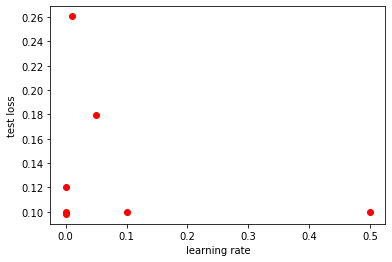

In [13]:
#plotting loss_value v/s learning rate
test_loss_values
plt.plot(learning_rate_values, test_loss_values, 'ro')
plt.xlabel("learning rate")
plt.ylabel("test loss")

In [57]:
#for the best observed learning rate, using the neural network to predict the test outputs 
NN = Neural_Network()  
learning_rate = 0.0001
NN.train(x_train, y_train, learning_rate)
epoch = 3
for q in range(int(epoch)): # trains the NN 1,000 times
    print ("Training Loss: \n" + str((np.mean(np.square(y_train - NN.forward(x_train))))))# mean sum squared loss
    NN.train(x_train, y_train, learning_rate)

print ("Test Loss: \n" + str(np.mean(np.square(y_test - NN.forward(x_test)))))

Training Loss: 
0.23382779608457993
Training Loss: 
0.15041088983755982
Training Loss: 
0.10012070002287236
Test Loss: 
0.0997556770316053


In [58]:
#feed forward prediction on the test dataset
output = NN.forward(x_test)

In [59]:
y_predicted = []
for row in output : 
    y_predicted.append(np.argmax(row) + 1)

In [60]:
#calculating predictions for the test dataset
y_predicted = np.array(y_predicted)
y_predicted

array([2, 2, 4, ..., 2, 6, 8])

In [61]:
#considering actual test output for predicted dataset
y_test_output = []
for row in y_test : 
    y_test_output.append(np.argmax(row) + 1)
y_test_output = np.array(y_test_output)
y_test_output

array([8, 3, 2, ..., 5, 6, 7])

In [62]:
print(y_test_output.shape)
print(y_predicted.shape)

(10000,)
(10000,)


In [63]:
#computing the confusion matrix for the dataset
confusion_matrix = np.zeros(shape = [10000,10000])
for i in range(10000):
    confusion_matrix[y_test_output[i]][y_predicted[i]] += 1
        
print(confusion_matrix)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  66. 484. ...   0.   0.   0.]
 [  0.  75. 180. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [64]:
#getting true positive using confusion matrix
TruePositive = np.diag(confusion_matrix) 
TruePositive

array([  0.,  66., 180., ...,   0.,   0.,   0.])

In [65]:
#getting false positive using confusion matrix
FalsePositive = []
for i in range(10): 
    FalsePositive.append(sum(confusion_matrix[:,i]) - confusion_matrix[i,i])
FalsePositive

[0.0, 1063.0, 3463.0, 320.0, 1358.0, 1394.0, 644.0, 248.0, 512.0, 159.0]

In [66]:
#getting False Negative using confusion matrix
FalseNegative = []
for i in range(10): 
    FalseNegative.append(sum(confusion_matrix[i, :]) - confusion_matrix[i,i])
FalseNegative

[0.0, 914.0, 955.0, 990.0, 842.0, 763.0, 834.0, 908.0, 981.0, 965.0]

In [67]:
#getting true negative using confusion matrix
TrueNegative = []
for i in range(10): 
    temp = np.delete(confusion_matrix, i, 0) # delete ith row 
    temp = np.delete(temp, i, 1) # delete ith column 
    TrueNegative.append(sum(sum(temp))) 
TrueNegative


[10000.0,
 7957.0,
 5402.0,
 8648.0,
 7632.0,
 7624.0,
 8464.0,
 8794.0,
 8460.0,
 8867.0]

In [68]:
#computing classwise accuracy precision recall and F-Score
for i in range(10):
    print("\nClass ", i+1)
    print("Accuracy : ", (TruePositive[i] + TrueNegative[i]) / (TruePositive[i] + TrueNegative[i] + FalsePositive[i] + FalseNegative[i]))
    precision = (TruePositive[i]) / (TruePositive[i] + FalsePositive[i])
    print("Precision : ", precision)
    recall = (TruePositive[i]) / (TruePositive[i] + FalseNegative[i])
    print("Recall : ", recall)
    print("F-Score : ", (2 * precision * recall) / (precision + recall))


Class  1
Accuracy :  1.0
Precision :  nan
Recall :  nan
F-Score :  nan

Class  2
Accuracy :  0.8023
Precision :  0.05845881310894597
Recall :  0.0673469387755102
F-Score :  0.06258890469416785

Class  3
Accuracy :  0.5582
Precision :  0.04940982706560527
Recall :  0.15859030837004406
F-Score :  0.07534533277521975

Class  4
Accuracy :  0.869
Precision :  0.11602209944751381
Recall :  0.040697674418604654
F-Score :  0.06025824964131995

Class  5
Accuracy :  0.78
Precision :  0.11009174311926606
Recall :  0.16633663366336635
F-Score :  0.13249211356466875

Class  6
Accuracy :  0.7843
Precision :  0.13577185368877867
Recall :  0.2230142566191446
F-Score :  0.16878612716763003

Class  7
Accuracy :  0.8522
Precision :  0.08262108262108261
Recall :  0.06502242152466367
F-Score :  0.0727728983688833

Class  8
Accuracy :  0.8844
Precision :  0.16778523489932887
Recall :  0.05219206680584551
F-Score :  0.07961783439490447

Class  9
Accuracy :  0.8507
Precision :  0.08407871198568873
Recall :  

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
